In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Profit')

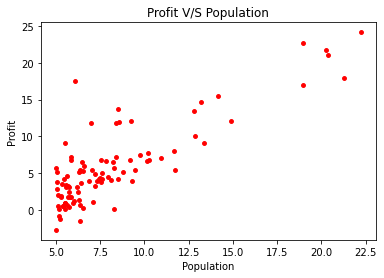

In [22]:
#Importing and Visualizing The Data
data = pd.read_csv("ex1data1.txt")

x = data["Population"]
y = data["Profit"]


plt.scatter(x, y, c ="red", s=15)
plt.title("Profit V/S Population")
plt.xlabel("Population")
plt.ylabel("Profit")


In [32]:

X = x.to_numpy()
ones = np.ones((97,1))
# print(ones)
X = np.resize(X, (97,1))
X_feature = np.append(ones,X,axis=1)
print(X.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(97, 1)
